# TASK 2 : Titanic Survival Prediction

- Name - Manish Sharma
- Batch - July 2024
- Domain - Data Science
- Aim - To build a Model that Predicts whether a passenger on the Titanic survived or not

### Introduction of Dataset :
The dataset contains information about passengers who boarded the Titanic. It includes features like PassengerId, Survived (whether they survived or not), Pclass (ticket class), Sex, Age, SibSp (number ofsiblings/spouses aboard), Parch (number of parents/children aboard), Ticket, Fare (passenger fare), Cabin, and Embarked (port of embarkation). There are a total of 10 passengers in the dataset.

### Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- pandas is for data handling and manipulation.
- NumPy is for numerical computations and array operations.
- matplotlib is for creating basic plots.
- seaborn is for creating more sophisticated statistical visualizations.

### Importing Dataset

In [2]:
t = pd.read_csv(f"titanic.csv")

In [3]:
t

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Columns Description :
- PassengerId	: A unique identifier for each passenger.
- Survived	: Whether the passenger survived or not (0 = no, 1 = yes).
- Pclass	    : The passenger's ticket class (1 = 1st, 2 = 2nd, 3 = 3rd).
- Sex	        : The passenger's sex.
- Age	        : The passenger's age in years.
- SibSp	    : The number of siblings or spouses aboard the Titanic with the passenger.
- Parch	    : The number of parents or children aboard the Titanic with the passenger.
- Ticket	    : The passenger's ticket number.
- Fare	    : The passenger's fare in pounds.
- Cabin	    : The passenger's cabin number.
- Embarked	: The port where the passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton).

In [4]:
t.shape

(891, 12)

- From shape function we conclude the there are 891 ROWS and 12 COLUMNS

### " info " function gives the summary of the Dataset
- Data Type: It shows that all data type of columns.
- Non-Null Count: It counts the non null values of the columns.
- Memory Usage: It indicates the DataFrame's approximate memory footprint.

In [5]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
t.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


from the above cell we conclude that:
- There are some null rows in Age, Cabin, Embarked columns
- we can also get the value of count, mean, std, min, 25%, 50%, 75%, max of all columns of data set using describe function 

###  "isnull" function is use to get only null values in the columns

In [7]:
t.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

from the above cell it is clear that there are few missing values in AGE, CABIN, EMBARKED columns 

### The "value_counts()" function is used to get the number of times each unique value appears in a DataFrame column.

In [8]:
t.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

- A total of 549 passengers on the Titanic did not survive (indicated by 0).
- A total of 342 passengers on the Titanic survived (indicated by 1).

<AxesSubplot:xlabel='Survived', ylabel='count'>

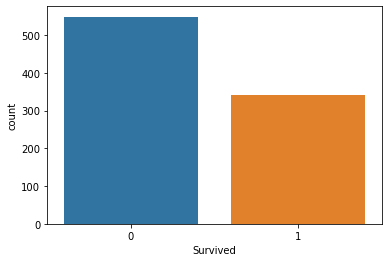

In [9]:
sns.countplot(x=t.Survived)

It provides a visual representation of the data you obtained from t.Survived.value_counts(), where you found 549 deaths and 342 survivors.

In [10]:
t.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

Lets visualize the count of servivals with respect to Sex

<AxesSubplot:xlabel='Survived', ylabel='count'>

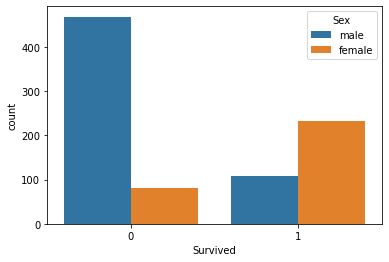

In [11]:
sns.countplot(x = t.Survived, hue = t.Sex)

- It shows a seaborn countplot that visualizes the distribution of survival (Survived = 0 or 1)  across genders (Sex)

- Based on these observations, you can draw a conclusion about the relationship between gender and survival

Lets visualize the count of servivals with respect to Pclass

<AxesSubplot:xlabel='Survived', ylabel='count'>

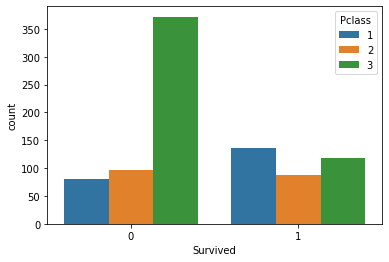

In [12]:
sns.countplot(x=t.Survived, hue = t.Pclass)

Passenger class significantly impacted survival rates on the Titanic. 
- Higher class (class 1) passengers had a better chance of survival.
- Lower class (class 3) passengers had a low chance of survival.

C:\Users\Manish Sharma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

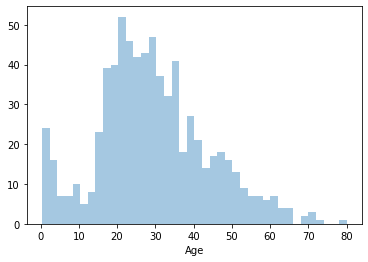

In [13]:
sns.distplot(t["Age"],bins = 40, kde = False)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

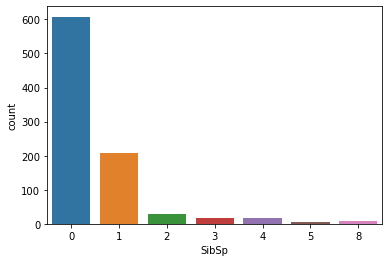

In [14]:
sns.countplot(x = "SibSp",data = t)

- Most passengers on the Titanic traveled alone, 
- with few having more than one sibling or spouse aboard.

# Data Cleaning

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

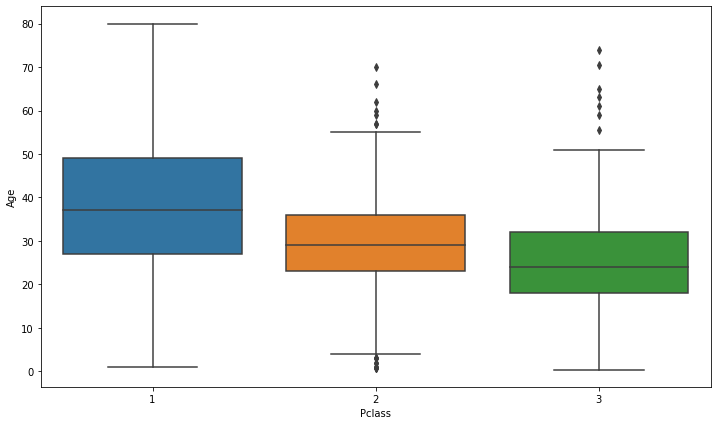

In [15]:
plt.figure(figsize = (12,7))
sns.boxplot(x = "Pclass", y = "Age", data = t)

- Passengers in higher classes tend to be older on average.
- there are outlier in Pclass 2 and 3 

### Taking age mean of each class

In [16]:
p1 = t[t['Pclass'] == 1]
p1.Age.mean()
round(p1.Age.mean())

38

In [17]:
p2 = t[t['Pclass'] == 2]
p2.Age.mean()
round(p2.Age.mean())

30

In [18]:
p3 = t[t['Pclass'] == 3]
p3.Age.mean()
round(p3.Age.mean())

25

### Filling the Missing Data of Age column with its mean with respect to its Pclass

In [19]:
def input_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age
    
t["Age"] = t[["Age","Pclass"]].apply(input_age,axis = 1)

In [20]:
t.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Now there is no null values in Age column

In [21]:
t

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Filling the Missing Data of Embarked column, with highest Embarked Value

In [22]:
t.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
t['Embarked'].replace(np.nan, 'S', inplace=True)
t

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [24]:
t.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

- Now there is no null values in Embarked column

### There are High percentage of missing values in the Cabin column so we will drop the column because we cannot fill the missing data of cabin column

In [25]:
t.drop('Cabin',axis = 1,inplace = True)
t

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [26]:
t['Age'] = t['Age'].astype(int)

- Convertion Data type of age column to integer

In [27]:
t

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C


In [30]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

t["Sex"] = labelencoder.fit_transform(t["Sex"])
t

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,25,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26,0,0,111369,30.0000,C


- 1 for Male
- 0 for Female

In [31]:
correlation_matrix = t.corr()
correlation_matrix

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.035426,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.050165,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.404327,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.079876,-0.114631,-0.245489,-0.182333
Age,0.035426,-0.050165,-0.404327,0.079876,1.000000,-0.243320,-0.175524,0.121177
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.243320,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.175524,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.121177,0.159651,0.216225,1.000000


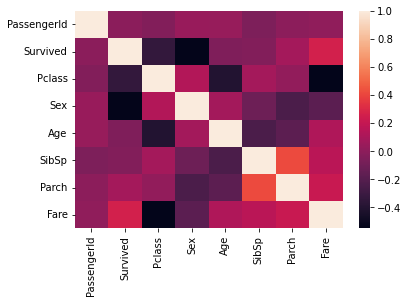

In [32]:
sns.heatmap(correlation_matrix)
plt.show()

From the above heatmap we conclude that Sex, Pclass column is highly dependent on Survived

In [33]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

t["Embarked"] = labelencoder.fit_transform(t["Embarked"])
t

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27,0,0,211536,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19,0,0,112053,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,25,1,2,W./C. 6607,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26,0,0,111369,30.0000,0


- S -> 0
- C -> 1
- Q -> 2

In [34]:
correlation_matrix = t.corr()
correlation_matrix

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.035426,-0.057527,-0.001652,0.012658,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.050165,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.404327,0.083081,0.018443,-0.549500,0.162098
Sex,0.042939,-0.543351,0.131900,1.000000,0.079876,-0.114631,-0.245489,-0.182333,0.108262
Age,0.035426,-0.050165,-0.404327,0.079876,1.000000,-0.243320,-0.175524,0.121177,-0.015365
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.243320,1.000000,0.414838,0.159651,0.068230
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.175524,0.414838,1.000000,0.216225,0.039798
Fare,0.012658,0.257307,-0.549500,-0.182333,0.121177,0.159651,0.216225,1.000000,-0.224719
Embarked,0.013128,-0.167675,0.162098,0.108262,-0.015365,0.068230,0.039798,-0.224719,1.000000


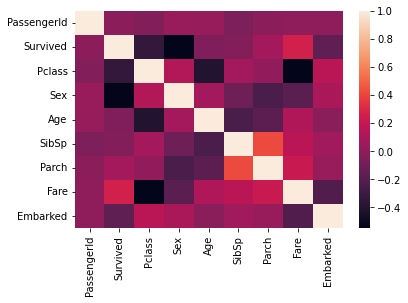

In [35]:
sns.heatmap(correlation_matrix)
plt.show()

In [36]:
t["Fare"]=t["Fare"].round().astype(int)

- Round off the fair column (Float to int)

In [37]:
correlation_matrix = t.corr()
correlation_matrix

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.035426,-0.057527,-0.001652,0.012646,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.050165,-0.035322,0.081629,0.257088,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.404327,0.083081,0.018443,-0.549638,0.162098
Sex,0.042939,-0.543351,0.131900,1.000000,0.079876,-0.114631,-0.245489,-0.181962,0.108262
Age,0.035426,-0.050165,-0.404327,0.079876,1.000000,-0.243320,-0.175524,0.121339,-0.015365
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.243320,1.000000,0.414838,0.159912,0.068230
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.175524,0.414838,1.000000,0.215967,0.039798
Fare,0.012646,0.257088,-0.549638,-0.181962,0.121339,0.159912,0.215967,1.000000,-0.224547
Embarked,0.013128,-0.167675,0.162098,0.108262,-0.015365,0.068230,0.039798,-0.224547,1.000000


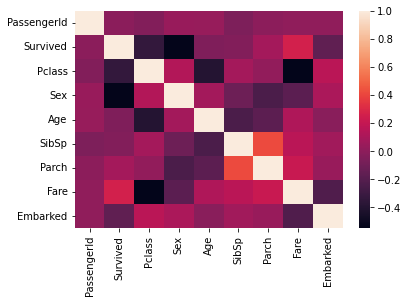

In [38]:
sns.heatmap(correlation_matrix)
plt.show()

From the above heatmap we conclude that Sex, Pclass, Fare columns is highly dependent on Survived

In [39]:
t['Family'] = t['SibSp'] + t['Parch']

- we will add family column which add SibSp and Parch because SibSp and Parch both column Depend on survival

In [40]:
correlation_matrix = t.corr()
correlation_matrix

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.035426,-0.057527,-0.001652,0.012646,0.013128,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.050165,-0.035322,0.081629,0.257088,-0.167675,0.016639
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.404327,0.083081,0.018443,-0.549638,0.162098,0.065997
Sex,0.042939,-0.543351,0.131900,1.000000,0.079876,-0.114631,-0.245489,-0.181962,0.108262,-0.200988
Age,0.035426,-0.050165,-0.404327,0.079876,1.000000,-0.243320,-0.175524,0.121339,-0.015365,-0.253990
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.243320,1.000000,0.414838,0.159912,0.068230,0.890712
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.175524,0.414838,1.000000,0.215967,0.039798,0.783111
Fare,0.012646,0.257088,-0.549638,-0.181962,0.121339,0.159912,0.215967,1.000000,-0.224547,0.217188
Embarked,0.013128,-0.167675,0.162098,0.108262,-0.015365,0.068230,0.039798,-0.224547,1.000000,0.066516
Family,-0.040143,0.016639,0.065997,-0.200988,-0.253990,0.890712,0.783111,0.217188,0.066516,1.000000


- From the above heatmap we can not conclude that Age and Family columns is depend on Survived
- but we know the Age and Family column have major role in survival
- Show we will consisder Age and Family columns

### Reading dataset after completion of EDA

In [41]:
t

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,8,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53,2,1
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27,0,0,211536,13,2,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19,0,0,112053,30,2,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,25,1,2,W./C. 6607,23,2,3
889,890,1,1,"Behr, Mr. Karl Howell",1,26,0,0,111369,30,0,0


In [42]:
t.shape

(891, 12)

In [43]:
t.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Family         0
dtype: int64

In [44]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    object
 4   Sex          891 non-null    int32 
 5   Age          891 non-null    int32 
 6   SibSp        891 non-null    int64 
 7   Parch        891 non-null    int64 
 8   Ticket       891 non-null    object
 9   Fare         891 non-null    int32 
 10  Embarked     891 non-null    int32 
 11  Family       891 non-null    int64 
dtypes: int32(4), int64(6), object(2)
memory usage: 69.7+ KB


#### After Transforming the data we conclude that:
   - There are 891 ROWS and 12 Columns
   - No null values in columns
   - No duplicate values in columns
   - Type of Numerical data is int

# Machine Learning

### We are considering that "Pclass","Sex","Age","Fare","Family" columns wil depends on servival

In [45]:
x = t[["Pclass","Sex","Age","Fare","Family"]]
y = t["Survived"]

#### Splits data into training and testing sets for model development.

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

- Import: Imports the train_test_split function from the sklearn.model_selection module.
- Splitting: Divides the data into two sets:
    - X_train: Features for training the model.
    - X_test: Features for testing the model's performance.
    - Y_train: Target variable for training the model.
    - Y_test: Target variable for testing the model's performance.
- Parameters:
    - test_size = 0.2 : Specifies that 20% of the data will be used for testing, and the remaining 80% for training.
    - random_state = 0 : Sets a random seed for reproducibility. This ensures that the same random split is obtained each time the code runs with the same random_state value.

In [47]:
from sklearn.linear_model import LogisticRegression

# Assuming your training data is in X_train and Y_train
log = LogisticRegression(random_state=0)  # Note the capitalization of 'LogisticRegression'
log.fit(X_train, Y_train)


LogisticRegression(random_state=0)

In [ ]:
Import: from sklearn.linear_model import LogisticRegression imports the Logistic Regression class.
Model Creation: log = LogisticRegression(random_state=0) creates a Logistic Regression model instance. The random_state parameter sets a seed for reproducibility, ensuring consistent model behavior when re-running with the same seed.
Model Fitting: log.fit(X_train, Y_train) trains the model using the features in X_train and the corresponding target labels in Y_train. During this process, the model learns the relationship between the features and the target variable.
In summary, this code creates and trains a Logistic Regression model for classification on your training data.

In [48]:
pred = log.predict(X_test)
print(pred)

[0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


- The code generates predictions for the target variable using the trained logistic regression model on the test data X_test.
- The resulting pred array contains the predicted class labels for each instance in the test set.
- In essence, it applies the learned model to make predictions on unseen data.

In [49]:
Y_test1 = Y_test.tolist() 

print(Y_test1)

[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0]


- It transforms the data type from a NumPy array to a Python list for potential downstream operations.

In [50]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test1, pred)
print("Accuracy:", accuracy)

Accuracy: 0.8044692737430168


- In aboce code we calculate the accuracy of the logistic regression model on the test set.
- accuracy_score(Y_test1, pred) computes the proportion of correct predictions made by the model compared to the actual values in Y_test1.
### The accuracy of the model is 80%

Code (given below) provides a simple demonstration of how to use a trained model for making predictions based on user-provided input.

In [54]:
p = int(input("Enter Your Class (1,2,3) : "))
s = int(input("Enter Your Sex (0 for Female, 1 for Male) : "))
a = int(input("Enter Your Age : "))
fare = int(input("Enter Your Fare Amount : "))
family = int(input("Enter total number of people going for a trip : "))
        
passing_list = [p,s,a,fare,family]
reso = log.predict([passing_list]) # pclass, sex, age, fare, family
if reso == 0:
    print("Sorry, Not Survived")
else:
    print("Survived")

Enter Your Class (1,2,3) : 1
Enter Your Sex (0 for Female, 1 for Male) : 1
Enter Your Age : 20
Enter Your Fare Amount : 55
Enter total number of people going for a trip : 0
Bach gaya


C:\Users\Manish Sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
